In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("Housing.csv")

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isnull().sum())


Dataset shape: (545, 13)
Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [38]:
# 2. Preprocessing
# Convert yes/no columns to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement',
               'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# One-hot encode furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print("\nAfter preprocessing:\n", df.head())



After preprocessing:
       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1

In [ ]:
# 3. Features and target
X_simple = df[['area']]             
X_complex = df.drop('price', axis=1) 
y = df['price']


In [39]:
# 4. Handle missing values (Imputer)
imputer = SimpleImputer(strategy='mean')
X_complex = imputer.fit_transform(X_complex)  # replaces NaN with column mean

# 5. Train/test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_complex, y, test_size=0.2, random_state=42
)

# 6. Train models
simple_model = LinearRegression().fit(X_train_s, y_train_s)
complex_model = LinearRegression().fit(X_train_c, y_train_c)

print("\nSimple model coefficient:", simple_model.coef_[0])
print("Simple model intercept:", simple_model.intercept_)
print("Complex model trained with", X_train_c.shape[1], "features")



Simple model coefficient: 425.72984193878284
Simple model intercept: 2512254.2639593435
Complex model trained with 5 features


c:\Users\hp\Desktop\gdsc_study_session_ML_g1\gdsc_study_session_ML_g1\.venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['mainroad' 'guestroom' 'basement' 'hotwaterheating' 'airconditioning'
 'prefarea']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



Simple model metrics:
MSE: 3,675,286,604,768.19 | MAE: 1,474,748.13 | RMSE: 1,917,103.70 | R2: 0.273

Complex model metrics:
MSE: 2,292,721,545,725.36 | MAE: 1,127,483.35 | RMSE: 1,514,173.55 | R2: 0.546


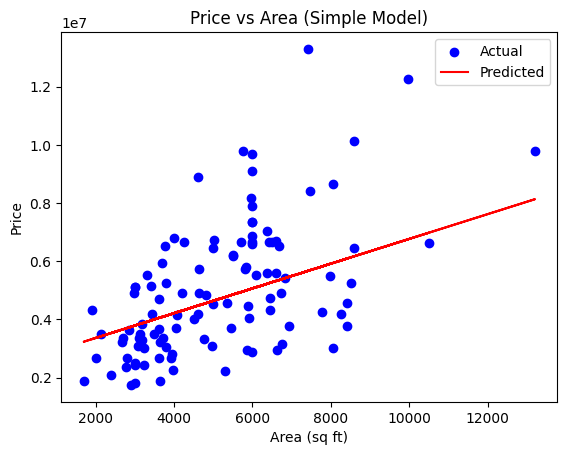

In [40]:
# 7. Predictions
y_pred_s = simple_model.predict(X_test_s)
y_pred_c = complex_model.predict(X_test_c)

# 8. Evaluation function
def evaluate(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{label} metrics:")
    print(f"MSE: {mse:,.2f} | MAE: {mae:,.2f} | RMSE: {rmse:,.2f} | R2: {r2:.3f}")

evaluate(y_test_s, y_pred_s, "Simple model")
evaluate(y_test_c, y_pred_c, "Complex model")

# 9. Visualization (simple model)
plt.scatter(X_test_s, y_test_s, color="blue", label="Actual")
plt.plot(X_test_s, y_pred_s, color="red", label="Predicted")
plt.title("Price vs Area (Simple Model)")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.legend()
plt.show()
